## EDA

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
# Chargement des données
file_path = 'results.csv'
df = pd.read_csv(file_path)
# Filtrage des matchs impliquant l'équipe marocaine
df_morocco = df[(df['home_team'] == 'Morocco') | (df['away_team'] == 'Morocco')]

# Affichage des premières lignes du dataframe filtré
print(df_morocco.head())

# Résumé statistique
print(df_morocco.describe())

            date home_team   away_team  home_score  away_score  \
4582  1958-04-03   Morocco       Libya         3.0         1.0   
4942  1960-01-01   Morocco  Yugoslavia         0.0         5.0   
5140  1960-10-30   Morocco     Tunisia         2.0         1.0   
5149  1960-11-13   Tunisia     Morocco         2.0         1.0   
5163  1960-12-11   Morocco   German DR         2.0         3.0   

                        tournament        city  country  neutral  
4582                      Friendly  Casablanca  Morocco    False  
4942                      Friendly  Casablanca  Morocco    False  
5140  FIFA World Cup qualification  Casablanca  Morocco    False  
5149  FIFA World Cup qualification       Tunis  Tunisia    False  
5163                      Friendly  Casablanca  Morocco    False  
       home_score  away_score
count  581.000000  581.000000
mean     1.438898    0.812392
std      1.329429    0.990081
min      0.000000    0.000000
25%      0.000000    0.000000
50%      1.000000    

In [34]:
# Convertir les dates en format datetime
df_morocco['date'] = pd.to_datetime(df_morocco['date'], errors='coerce')

df_morocco=df_morocco[df_morocco['date']>'2018-01-01']
print(df_morocco.count())
# Résumé statistique
print(df_morocco.describe())

date          80
home_team     80
away_team     80
home_score    80
away_score    80
tournament    80
city          80
country       80
neutral       80
dtype: int64
       home_score  away_score
count   80.000000   80.000000
mean     1.412500    0.775000
std      1.229323    0.954337
min      0.000000    0.000000
25%      0.000000    0.000000
50%      1.000000    0.500000
75%      2.000000    1.000000
max      5.000000    4.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_18820\3508767046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_morocco['date'] = pd.to_datetime(df_morocco['date'], errors='coerce')


            date home_team   away_team  home_score  away_score tournament  \
41278 2018-03-23    Serbia     Morocco         1.0         2.0   Friendly   
41347 2018-03-27   Morocco  Uzbekistan         2.0         0.0   Friendly   
41418 2018-05-31   Ukraine     Morocco         0.0         0.0   Friendly   
41484 2018-06-04  Slovakia     Morocco         1.0         2.0   Friendly   
41536 2018-06-09   Estonia     Morocco         1.0         3.0   Friendly   

             city      country  neutral  year  home_score_morocco  \
41278       Turin        Italy     True  2018                 NaN   
41347  Casablanca      Morocco    False  2018                 2.0   
41418      Geneva  Switzerland     True  2018                 NaN   
41484      Geneva  Switzerland     True  2018                 NaN   
41536     Tallinn      Estonia    False  2018                 NaN   

       away_score_morocco  
41278                 2.0  
41347                 NaN  
41418                 0.0  
41484     

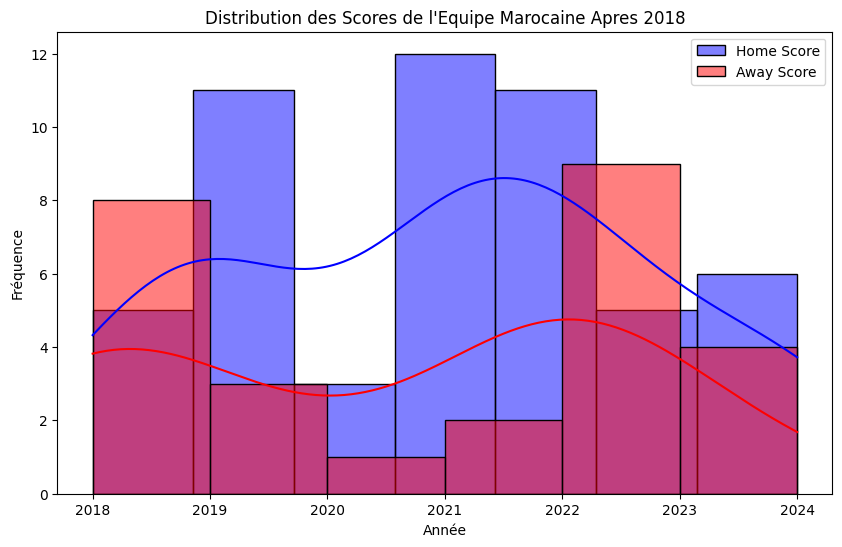

In [35]:
# Ajouter une colonne 'year' pour les années
df_morocco['year'] = df_morocco['date'].dt.year

# Séparer les scores de l'équipe marocaine
df_morocco['home_score_morocco'] = df_morocco.apply(
    lambda row: row['home_score'] if row['home_team'] == 'Morocco' else None, axis=1)

df_morocco['away_score_morocco'] = df_morocco.apply(
    lambda row: row['away_score'] if row['away_team'] == 'Morocco' else None, axis=1)

# Afficher les premières lignes du dataframe pour vérifier
print(df_morocco.head())

# Distribution des scores de l'équipe marocaine avec l'année en colonne
plt.figure(figsize=(10, 6))
sns.histplot(df_morocco[df_morocco['home_score_morocco'].notna()]['year'], 
             kde=True, color='blue', label='Home Score')
sns.histplot(df_morocco[df_morocco['away_score_morocco'].notna()]['year'], 
             kde=True, color='red', label='Away Score')
plt.legend()
plt.title('Distribution des Scores de l\'Equipe Marocaine Apres 2018')
plt.xlabel('Année')
plt.ylabel('Fréquence')
plt.show()

# Résultats des Matchs (Victoires, Défaites, Nuls)

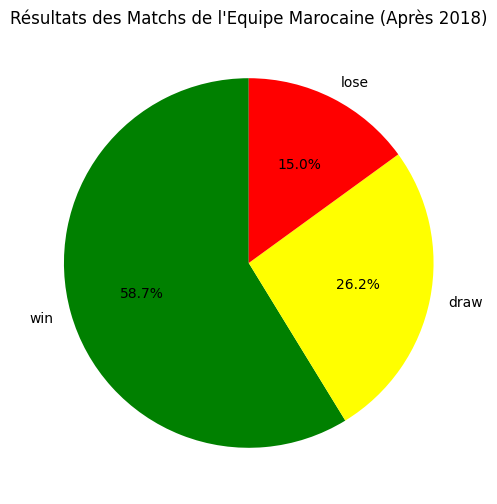

In [36]:
# Déterminer les résultats des matchs pour l'équipe marocaine
df_morocco['result'] = df_morocco.apply(
    lambda row: 'win' if (row['home_team'] == 'Morocco' and row['home_score'] > row['away_score']) or 
    (row['away_team'] == 'Morocco' and row['away_score'] > row['home_score']) else 
    ('draw' if row['home_score'] == row['away_score'] else 'lose'), axis=1)

result_counts = df_morocco['result'].value_counts()

plt.figure(figsize=(8, 6))
result_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'red'])
plt.title('Résultats des Matchs de l\'Equipe Marocaine (Après 2018)')
plt.ylabel('')
plt.show()

<Figure size 1200x800 with 0 Axes>

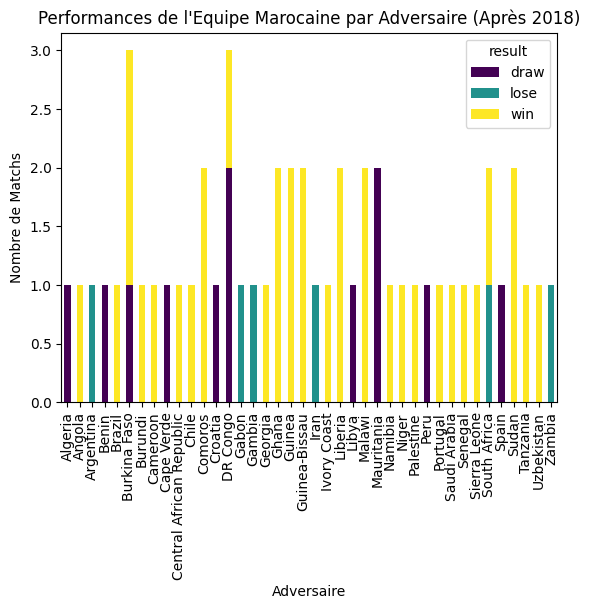

In [42]:
# Compter les victoires, défaites et nuls par adversaire
performance_by_opponent = df_morocco.groupby(['home_team', 'away_team', 'result']).size().unstack(fill_value=0)
morocco_performance = performance_by_opponent.loc[performance_by_opponent.index.get_level_values(0) == 'Morocco'].reset_index(level=0, drop=True)

plt.figure(figsize=(12, 8))
morocco_performance.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Performances de l\'Equipe Marocaine par Adversaire (Après 2018)')
plt.xlabel('Adversaire')
plt.ylabel('Nombre de Matchs')
plt.show()
